In [1]:
import os
import csv
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [6]:
dfc = pd.read_csv('./all_comments.csv')
dfm = pd.read_csv('./markets.csv')

# take users out 
dfcu = dfc[dfc['user_type'] == 'buyer']
dfu = dfc[dfc['user_type'] == 'buyer'].drop_duplicates(subset=['user_name'])
dfu = dfu.set_index(dfu['user_name'])

In [11]:
user_deals = int(dfu['deals_count'].sum())

deals_min = dfm['deals_min'].sum()
deals_max = dfm['deals_max'].sum()
comments_count_total = dfm['summary_comments'].sum()

reviews_share_min = comments_count_total/deals_min
reviews_share_max = comments_count_total/deals_max

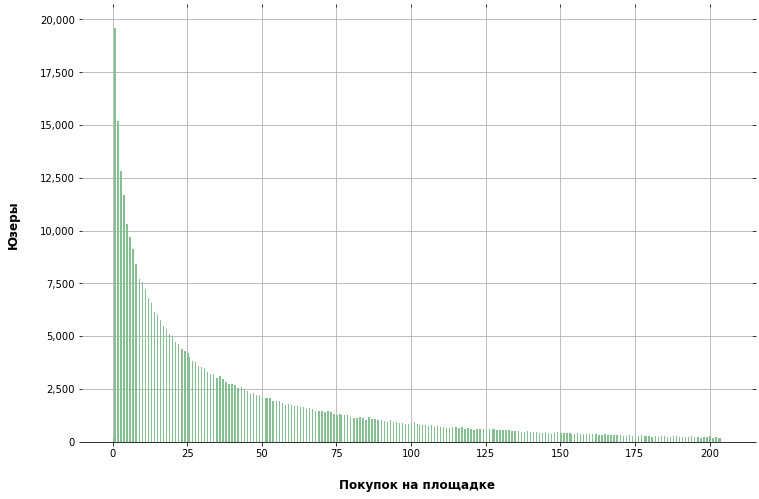

In [77]:
dfu1 = dfu[dfu['deals_count'] < dfu['deals_count'].quantile(0.95)]

ax = dfu1.hist(column='deals_count', bins=400, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(
        axis="both",
        which="both",
        bottom="off",
        top="off",
        labelbottom="on",
        left="off",
        right="off",
        labelleft="on"
    )

    # Draw horizontal axis lines
    vals = x.get_yticks(minor=True)
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.9, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Покупок на площадке", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Юзеры", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

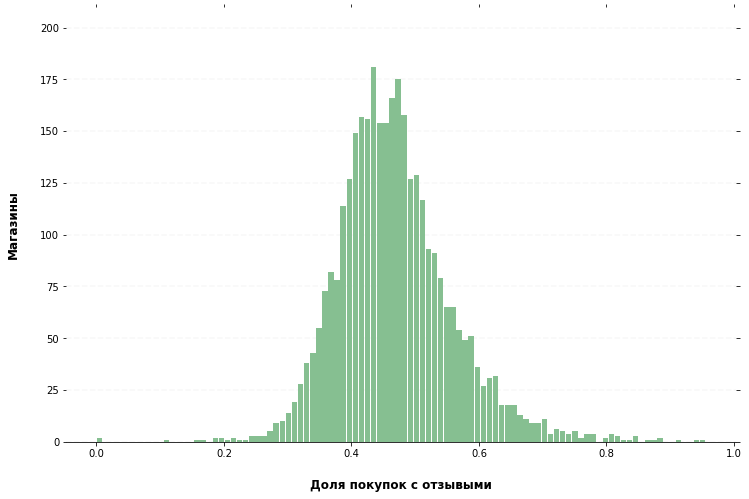

In [291]:
ax = dfm.hist(column='commented_share_max', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Доля покупок с отзывыми", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Магазины", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [188]:
low_border = (500,
 750,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 15000,
 20000,
 25000,
 30000,
 40000,
 50000,
 75000,
 100000,
 150000,
 200000,
 250000,
 300000)
top_border = []
for i, num in enumerate(low_border):
    if i < 1:
        continue
    top_border.append(num-1)
top_border.append(350000-1)
top_border = tuple(top_border)
borders = dict(zip(low_border, top_border))

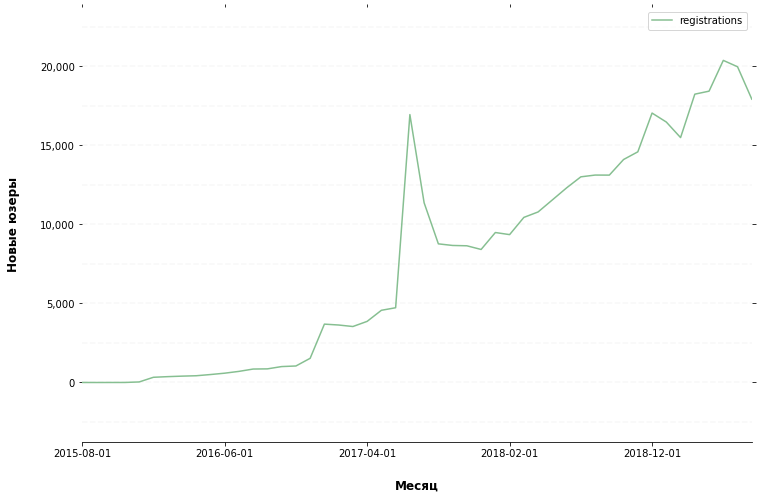

In [300]:
registrations = pd.read_csv('./new_users_by_month.csv')
registrations = registrations.set_index(registrations['date'])
registrations.drop('date', axis=1, inplace=True)

ax = registrations.plot(grid=False, figsize=(12,8), color='#86bf91', zorder=2)

# ax = ax[0]
# for x in ax:
x = ax
    # Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Месяц", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Новые юзеры", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [80]:
dfm

,Unnamed: 0,Unnamed: 0.1,10,8,6,4,2,0,shop_header,deals_min,summary_comments,commented_share,deals_max,commented_share_min,commented_share_max
0,0,0,522,6,3,1,1,2,King of Buzz,1000,535,53.500000,1499,0.535000,0.356905
1,1,1,253,8,1,1,1,2,БУКЕТ ЧУВАШИИ Premium,500,266,53.200000,749,0.532000,0.355140
2,2,2,3717,85,44,9,16,21,spbShop,6000,3892,64.866667,6999,0.648667,0.556079
3,3,3,9530,233,50,17,22,26,masterclad shop,20000,9878,49.390000,24999,0.493900,0.395136
4,4,4,1076,19,6,1,1,4,Johnson & Johnson,1500,1107,73.800000,1999,0.738000,0.553777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,3371,3404,33,0,0,0,0,0,Marussia Shop,63,33,52.380952,63,0.523810,0.523810
3372,3372,3405,334,5,3,1,4,1,Drug's tvoego druga,500,348,69.600000,749,0.696000,0.464619
3373,3373,3406,2406,20,4,6,4,14,★LIRIKA_SHOP★ (Ищем Курьеров на ЛИРИКУ),4000,2454,61.350000,4499,0.613500,0.545455
3374,3374,3407,100,4,2,0,0,4,BLACK WARRIOR,254,110,43.307087,254,0.433071,0.433071


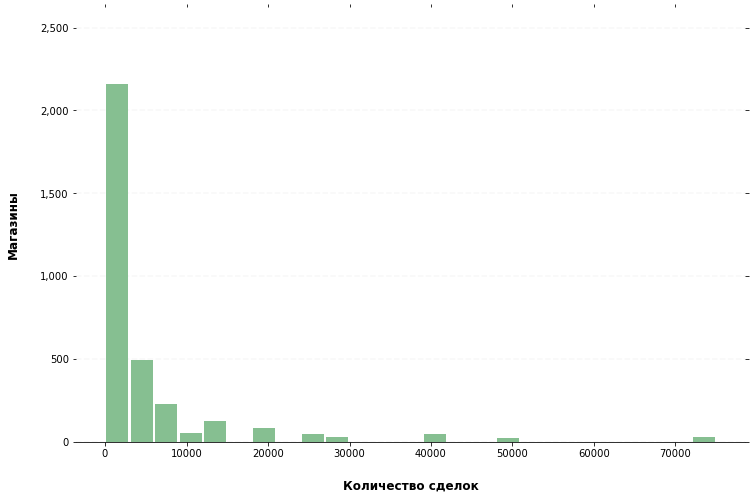

In [82]:
dfm1 = dfm[dfm['deals_max'] < dfm['deals_max'].quantile(0.99)]

ax = dfm1.hist(column='deals_max', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Количество сделок", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Магазины", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

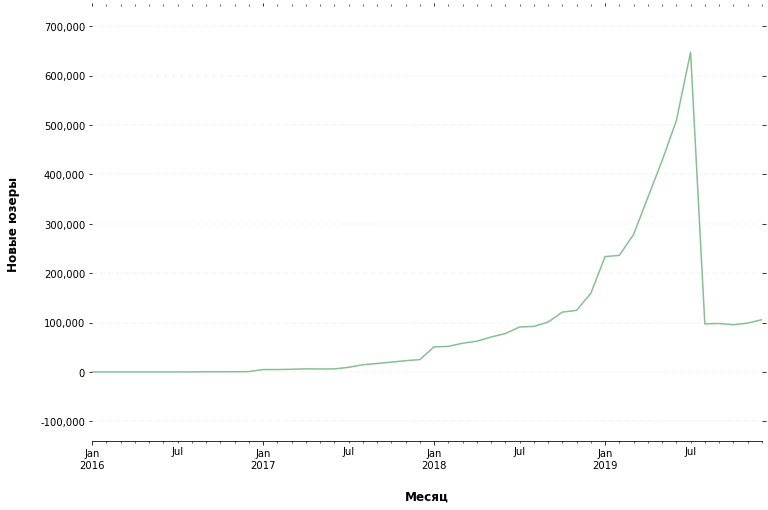

In [70]:
datedate = pd.to_datetime(dfc['date'])
dfcd = dfc.set_index(datedate)
dfcd_month = dfcd.resample('M')['deals_count'].count()

# registrations = pd.read_csv('./new_users_by_month.csv')
# registrations = registrations.set_index(registrations['date'])
# registrations.drop('date', axis=1, inplace=True)

ax = dfcd_month.plot(grid=False, figsize=(12,8), color='#86bf91', zorder=2)

# ax = ax[0]
# for x in ax:
x = ax
    # Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Месяц", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Новые юзеры", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))